<a href="https://colab.research.google.com/github/ajaysaikiran2208/PySpark/blob/main/Logistic_regression_using_PySpark_for_predicting_credit_card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Predicting Credit card fraud detection

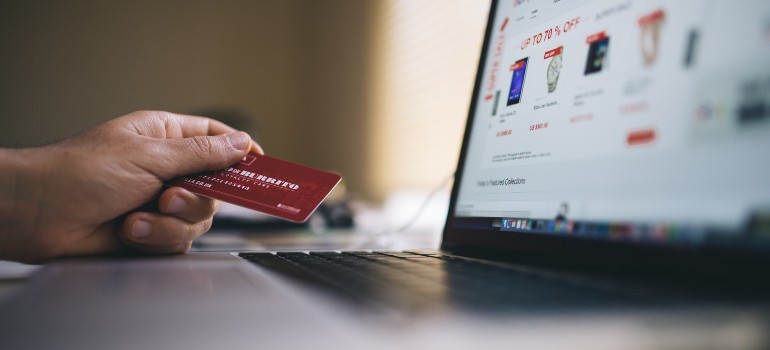

In [ ]:
pip install pyspark

     |████████████████████████████████| 212.4MB 91kB/s 
     |████████████████████████████████| 204kB 21.1MB/s 
  Created wheel for pyspark: filename=pyspark-3.1.2-py2.py3-none-any.whl size=212880768 sha256=023b51674a806a3bcf695ca9871c7a809ba6bdb3fc30b941ae070642415d8c39
  Stored in directory: /root/.cache/pip/wheels/40/1b/2c/30f43be2627857ab80062bef1527c0128f7b4070b6b2d02139
Successfully built pyspark


In [10]:
import pyspark
from pyspark.sql import SparkSession  #The entry point for programming spark with datasets and data API

In [11]:
#create instance of spark class
spark=SparkSession.builder.appName('credit_card').getOrCreate()  #The entry point into all functionality in Spark is the SparkSession class. To create a basic SparkSession, just use SparkSession.builder():

In [ ]:
import pandas as pd


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [13]:
#create spark dataframe of input csv file
df=spark.read.csv('/content/creditcard.csv'
                  ,inferSchema=True,header=True)
df.show(10)

+----+------------------+-------------------+------------------+------------------+-------------------+-------------------+--------------------+------------------+------------------+-------------------+------------------+------------------+------------------+------------------+------------------+-------------------+-------------------+-------------------+-------------------+-------------------+--------------------+-------------------+-------------------+------------------+-------------------+-------------------+--------------------+-------------------+------+-----+
|Time|                V1|                 V2|                V3|                V4|                 V5|                 V6|                  V7|                V8|                V9|                V10|               V11|               V12|               V13|               V14|               V15|                V16|                V17|                V18|                V19|                V20|                 V21|          

In [14]:
df.printSchema() #information about data same as .info()

root
 |-- Time: double (nullable = true)
 |-- V1: double (nullable = true)
 |-- V2: double (nullable = true)
 |-- V3: double (nullable = true)
 |-- V4: double (nullable = true)
 |-- V5: double (nullable = true)
 |-- V6: double (nullable = true)
 |-- V7: double (nullable = true)
 |-- V8: double (nullable = true)
 |-- V9: double (nullable = true)
 |-- V10: double (nullable = true)
 |-- V11: double (nullable = true)
 |-- V12: double (nullable = true)
 |-- V13: double (nullable = true)
 |-- V14: double (nullable = true)
 |-- V15: double (nullable = true)
 |-- V16: double (nullable = true)
 |-- V17: double (nullable = true)
 |-- V18: double (nullable = true)
 |-- V19: double (nullable = true)
 |-- V20: double (nullable = true)
 |-- V21: double (nullable = true)
 |-- V22: double (nullable = true)
 |-- V23: double (nullable = true)
 |-- V24: double (nullable = true)
 |-- V25: double (nullable = true)
 |-- V26: double (nullable = true)
 |-- V27: double (nullable = true)
 |-- V28: double (nulla

In [15]:
len(df.columns) #Length of the columns

31

In [16]:
df.select("Time").show(10) #Viewing time column

+----+
|Time|
+----+
| 0.0|
| 0.0|
| 1.0|
| 1.0|
| 2.0|
| 2.0|
| 4.0|
| 7.0|
| 7.0|
| 9.0|
+----+
only showing top 10 rows



In [20]:
df.select(["V"+str(x) for x in range(1,10)]).show(10) #List comprehension to get values from V1 TO V10

+------------------+-------------------+------------------+------------------+-------------------+-------------------+--------------------+------------------+------------------+
|                V1|                 V2|                V3|                V4|                 V5|                 V6|                  V7|                V8|                V9|
+------------------+-------------------+------------------+------------------+-------------------+-------------------+--------------------+------------------+------------------+
|  -1.3598071336738|-0.0727811733098497|  2.53634673796914|  1.37815522427443| -0.338320769942518|  0.462387777762292|   0.239598554061257|0.0986979012610507| 0.363786969611213|
|  1.19185711131486|   0.26615071205963|  0.16648011335321| 0.448154078460911| 0.0600176492822243|-0.0823608088155687| -0.0788029833323113|0.0851016549148104|-0.255425128109186|
| -1.35835406159823|  -1.34016307473609|  1.77320934263119| 0.379779593034328| -0.503198133318193|   1.8004993

In [21]:
df_pandas=df.toPandas()  #converting into Pandas Data Frame

In [22]:
df_pandas.head(10) #using head beacause it is pandas Df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,1.017614,0.836390,1.006844,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [23]:
from pyspark.ml import pipeline
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.feature import HashingTF,Tokenizer
from pyspark.ml.tuning import CrossValidator,ParamGridBuilder
from pyspark.ml.feature import VectorAssembler

In [24]:
df.columns[1:-1]

['V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount']

In [25]:
#Converting Strings into float

from pyspark.sql.functions import col
for col_name in df.columns[1:-1]+["Class"]:
  df=df.withColumn(col_name,col(col_name).cast('float'))

In [26]:
#Renaming the columns
df=df.withColumnRenamed("Class","label")

In [40]:
df.show()

+----+-----------+------------+------------+-----------+------------+------------+-------------+------------+-----------+-----------+-----------+------------+------------+------------+------------+-----------+-------------+------------+------------+------------+------------+-----------+------------+------------+------------+------------+------------+------------+------+-----+
|Time|         V1|          V2|          V3|         V4|          V5|          V6|           V7|          V8|         V9|        V10|        V11|         V12|         V13|         V14|         V15|        V16|          V17|         V18|         V19|         V20|         V21|        V22|         V23|         V24|         V25|         V26|         V27|         V28|Amount|label|
+----+-----------+------------+------------+-----------+------------+------------+-------------+------------+-----------+-----------+-----------+------------+------------+------------+------------+-----------+-------------+------------+------

In [27]:
,'''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''#Combining list of columns into one colimn

vectorAssembler=VectorAssembler(inputCols=df.columns[1:-1],outputCol='features')
df_tr=vectorAssembler.transform(df)
df_tr=df_tr.select(['features','label'])
df_tr.show(3)

+--------------------+-----+
|            features|label|
+--------------------+-----+
|[-1.3598071336746...|  0.0|
|[1.19185709953308...|  0.0|
|[-1.3583540916442...|  0.0|
+--------------------+-----+
only showing top 3 rows



In [28]:
df_tr.show(2,truncate=False)

+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-----+
|features                                                                                                                                                                                                                                                                                                                                                                                                                 

In [29]:
lr=LogisticRegression(maxIter=10,featuresCol='features',labelCol='label')

In [30]:
model=lr.fit(df_tr)

In [31]:
print(model.summary.areaUnderROC)

0.978163294061937


In [33]:
#Builder for a param grid used in grid search-based model selection.

parmGrid=ParamGridBuilder()\
.addGrid(lr.regParam,[0.1,0.01])\
.addGrid(lr.fitIntercept,[False,True])\
.addGrid(lr.elasticNetParam,[0.0,0.5,1.0])\
.build()

In [35]:
#cross validation performs model selection by splitting the dataset into a set of non-overlapping randomly partitioned folds which are used as separate training and test datasets
corssval=CrossValidator(estimator=lr,
                        estimatorParamMaps=parmGrid,
                        evaluator=BinaryClassificationEvaluator(),     #Evaluator for binary classification, which expects input columns rawPrediction, label and an optional weight column. The rawPrediction column can be of type double (binary 0/1 prediction, or probability of label 1) or of type vector (length-2 vector of raw predictions, scores, or label probabilities).
                        numFolds=2)

In [36]:
cvModel=corssval.fit(df_tr)

In [37]:
cvModel.avgMetrics

[0.8827454264812491,
 0.5586927715930218,
 0.5586933974052224,
 0.9780995398019225,
 0.5,
 0.5,
 0.8667457434301385,
 0.7989843418840873,
 0.6589345800846083,
 0.979951123673916,
 0.9488317382396096,
 0.9059568326315053]